#  Case Study- Aviation Accident Analysis

## This project is meant to explore, analyse and visualize aviation accidents and related factors such as reasons, survival rates, fatalities, locations etc. Further, the following factors are needed to be analysed:
  - The planes crashed per year.
  - People aboard per year during crashes.
  - People dead per year during crashes.
  - People survived per year during crashes.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import date, datetime, timedelta
import warnings
warnings.filterwarnings("ignore")

### Import dataset

In [2]:
data =  pd.read_csv("Dataset1.csv")

In [3]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


### Data Exploration

In [4]:
# Check shape of data
data.shape

(5268, 13)

In [5]:
data.columns


Index(['Date', 'Time', 'Location', 'Operator', 'Flight #', 'Route', 'Type',
       'Registration', 'cn/In', 'Aboard', 'Fatalities', 'Ground', 'Summary'],
      dtype='object')

In [6]:
# check basic information of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3562 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [7]:
# check statistical summary of data
data.describe()

,Aboard,Fatalities,Ground
count,5246.000000,5256.000000,5246.000000
mean,27.554518,20.068303,1.608845
std,43.076711,33.199952,53.987827
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [8]:
# check unique values of dataset
data.nunique()

Date            4753
Time            1005
Location        4303
Operator        2476
Flight #         724
Route           3244
Type            2446
Registration    4905
cn/In           3707
Aboard           239
Fatalities       191
Ground            50
Summary         4673
dtype: int64

In [9]:
#check any missing values present or not
data.isnull().sum()

Date               0
Time            2219
Location          20
Operator          18
Flight #        4199
Route           1706
Type              27
Registration     335
cn/In           1228
Aboard            22
Fatalities        12
Ground            22
Summary          390
dtype: int64

Replace NaN values of Time column by 00:00.

In [10]:
data["Time"]= data["Time"].replace(np.nan, "00:00")

In [11]:
data.Time.isnull().sum()

0

In [12]:
data["Time"].value_counts()

00:00    2223
15:00      32
12:00      31
11:00      29
16:00      26
         ... 
15:14       1
07:41       1
19:59       1
07:58       1
18:34       1
Name: Time, Length: 1005, dtype: int64

In [13]:
data.Time

0       17:18
1       06:30
2       00:00
3       18:30
4       10:30
        ...  
5263    06:30
5264    00:00
5265    00:15
5266    08:30
5267    00:00
Name: Time, Length: 5268, dtype: object

In [14]:
data['Time'] = data['Time'].str.replace('c: ','')
data['Time'] = data['Time'].str.replace('c:','')
data['Time'] = data['Time'].str.replace('c','')
data['Time'] = data['Time'].str.replace('12\'20','12:20')
data['Time'] = data['Time'].str.replace('18.40','18:40')
data['Time'] = data['Time'].str.replace('0943','09:43')
data['Time'] = data['Time'].str.replace('22\'08','22:08')
data['Time'] = data['Time'].str.replace('114:20','00:00')

In [15]:
data["Date"].value_counts()

02/28/1973    4
06/18/1972    4
08/28/1976    4
08/27/1992    4
09/11/2001    4
             ..
08/11/1982    1
01/25/1930    1
04/04/1994    1
05/07/1953    1
06/06/1971    1
Name: Date, Length: 4753, dtype: int64

In [16]:
data['Time'] = data['Date'] + ' ' +data['Time']

def todate(x):
    return datetime.strptime(x, '%m/%d/%Y %H:%M')

data['Time'] = data['Time'].apply(todate)

In [17]:
print('Data ranges from ' + str(data.Time.min()) + ' to ' + str(data.Time.max()))

Data ranges from 1908-09-17 17:18:00 to 2009-06-08 00:00:00


In [18]:
data.Operator = data.Operator.str.upper()

In [19]:
data.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,1908-09-17 17:18:00,"Fort Myer, Virginia",MILITARY - U.S. ARMY,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,1912-07-12 06:30:00,"AtlantiCity, New Jersey",MILITARY - U.S. NAVY,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,1913-08-06 00:00:00,"Victoria, British Columbia, Canada",PRIVATE,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,1913-09-09 18:30:00,Over the North Sea,MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,1913-10-17 10:30:00,"Near Johannisthal, Germany",MILITARY - GERMAN NAVY,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


# Exploratory Data Analysis (EDA)

### Total accidents by Year


In [20]:
Temp = data.groupby(data.Time.dt.year)[['Date']].count()
Temp.head()

,Date
Time,
1908,1
1912,1
1913,3
1915,2
1916,5


In [21]:
Temp = Temp.rename(columns={'Date':'Count'})

In [22]:
Temp.head()

,Count
Time,
1908,1
1912,1
1913,3
1915,2
1916,5


These are the total accident by year

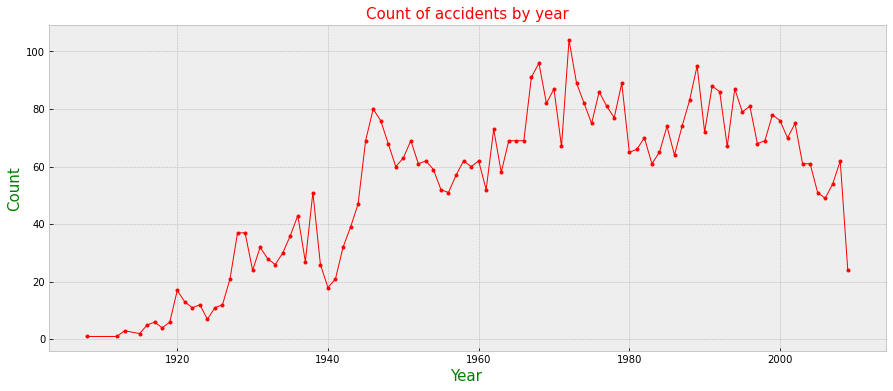

In [23]:
plt.figure(figsize=(15,6))
plt.style.use('bmh')
plt.plot(Temp.index, 'Count', data=Temp, color='red', marker='.', linewidth=1)

plt.xlabel('Year', fontsize=15, c="g")
plt.ylabel('Count', fontsize=15, c="g")
plt.title('Count of accidents by year', fontsize=15, c="red")
plt.show()

* **Count of Accident by Months**

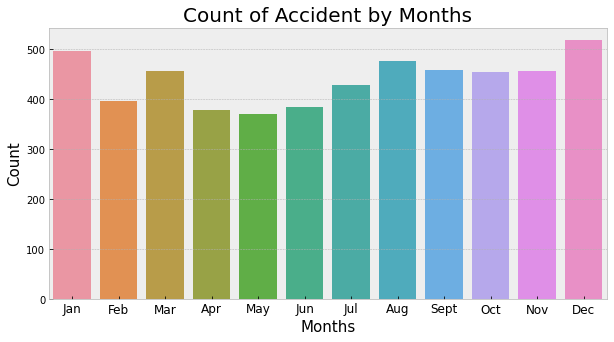

In [24]:
plt.figure(figsize=(10,5))
sns.countplot(data.Time.dt.month)

positions = (0,1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11)
labels= ("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sept", "Oct", "Nov", "Dec" )

plt.xticks(positions, labels, fontsize=12, rotation = 0)

plt.xlabel('Months', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.title('Count of Accident by Months', fontsize = 20)
plt.show()

* **Count of accidents by Weekday**

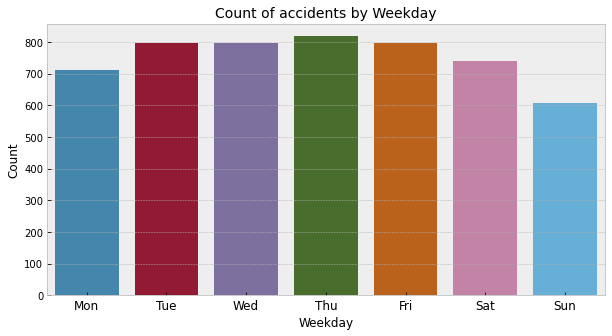

In [25]:
plt.figure(figsize=(10,5))
positions = (0,1, 2, 3, 4, 5, 6)
labels=('Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun')

sns.countplot(data.Time.dt.weekday)

plt.xticks(positions, labels, fontsize=12, rotation = 0)
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of accidents by Weekday', fontsize=14)
plt.show()

In [26]:
data.Time.dt.hour.value_counts()

0     2283
9      187
19     181
15     171
11     171
14     167
10     167
12     166
16     157
13     157
17     156
20     154
18     147
8      141
7      132
23     111
21     108
22     106
6       85
2       80
1       67
4       65
5       60
3       49
Name: Time, dtype: int64

In [27]:
# Drop hours = "0" 
hour = data.drop(index=data[data.Time.dt.hour==0].index)

hour.Time.dt.hour.unique()

array([17,  6, 18, 10,  1, 15, 23,  5,  8,  7, 21,  2, 13,  9, 22, 20,  4,
       14, 12,  3, 19, 11, 16], dtype=int64)

* **Count of accidents by Hours**

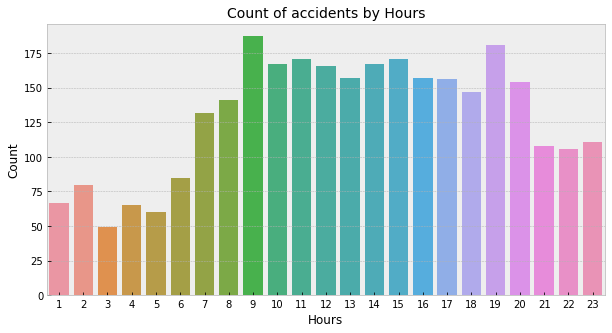

In [28]:
plt.figure(figsize=(10,5))
sns.countplot(hour.Time.dt.hour)

plt.xlabel('Hours', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of accidents by Hours', fontsize=14)
plt.show()

### Passenger vs military flights

In [29]:
Temp = data.copy()
Temp['isMilitary'] = Temp.Operator.str.contains('MILITARY')
Temp = Temp.groupby('isMilitary')[['isMilitary']].count()
Temp.index = ['Passenger', 'Military']
Temp

,isMilitary
Passenger,4469
Military,781


In [30]:
Temp2 = data.copy()
Temp2['Military'] = Temp2.Operator.str.contains('MILITARY')
Temp2['Passenger'] = Temp2.Military == False
Temp2 = Temp2.loc[:,['Time', 'Military', 'Passenger']]
Temp2

,Time,Military,Passenger
0,1908-09-17 17:18:00,True,False
1,1912-07-12 06:30:00,True,False
2,1913-08-06 00:00:00,False,True
3,1913-09-09 18:30:00,True,False
4,1913-10-17 10:30:00,True,False
...,...,...,...
5263,2009-05-20 06:30:00,True,False
5264,2009-05-26 00:00:00,False,True
5265,2009-06-01 00:15:00,False,True
5266,2009-06-07 08:30:00,False,True


In [31]:
Temp2 = Temp2.groupby(Temp2.Time.dt.year)[['Military', 'Passenger']].aggregate(np.count_nonzero)
Temp2.head()

,Military,Passenger
Time,,
1908,1,0
1912,1,0
1913,2,1
1915,2,0
1916,5,0


* **Plot Pie chart Total number of accidents by flight type**

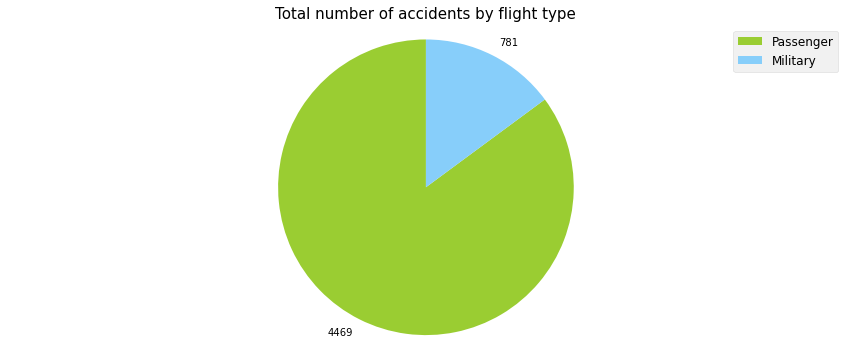

In [32]:
colors = ['yellowgreen', 'lightskyblue']
plt.figure(figsize=(15,6))
plt.pie(Temp.isMilitary, colors=colors, labels=Temp.isMilitary, startangle=90)
plt.legend(Temp.index, fontsize=12)
plt.title('Total number of accidents by flight type', fontsize=15)
plt.axis('equal')

plt.show()

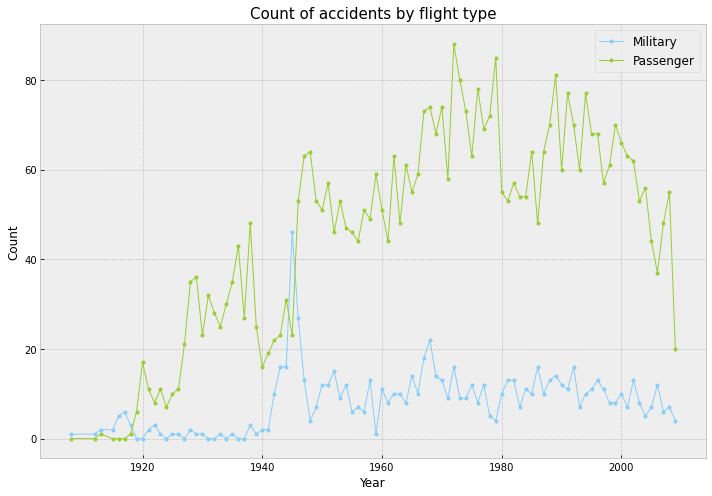

In [33]:
plt.figure(figsize=(10,7))

plt.plot(Temp2.index, 'Military', data=Temp2, color='lightskyblue', marker='.', linewidth=1)
plt.plot(Temp2.index, 'Passenger', data=Temp2, color='yellowgreen', marker='.', linewidth=1)

plt.legend(fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.title('Count of accidents by flight type', fontsize=15)
plt.tight_layout()
plt.show()

### Total Number of Fatalities

In [34]:
Fatalities = data.groupby(data.Time.dt.year).sum()
Fatalities['Proportion'] = Fatalities['Fatalities'] / Fatalities['Aboard']
Fatalities

,Aboard,Fatalities,Ground,Proportion
Time,,,,
1908,2.0,1.0,0.0,0.500000
1912,5.0,5.0,0.0,1.000000
1913,51.0,45.0,0.0,0.882353
1915,60.0,40.0,0.0,0.666667
1916,109.0,108.0,0.0,0.990826
...,...,...,...,...
2005,2164.0,1306.0,59.0,0.603512
2006,1413.0,1136.0,4.0,0.803963
2007,1364.0,931.0,57.0,0.682551


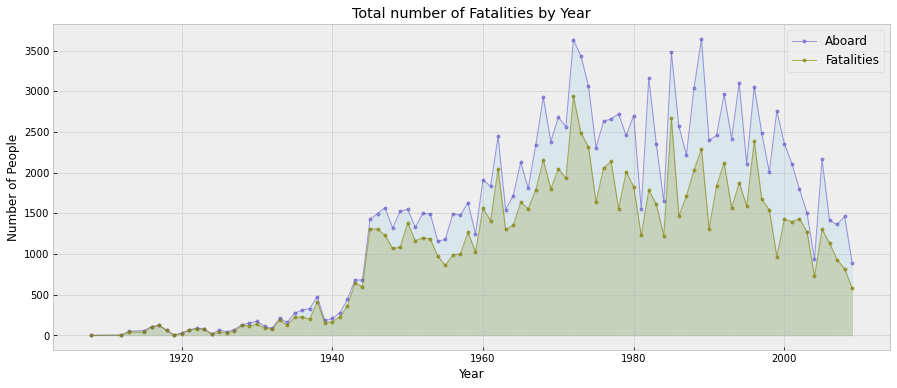

In [35]:
plt.figure(figsize=(15,6))
plt.fill_between(Fatalities.index, 'Aboard', data=Fatalities, color='skyblue', alpha=0.2)
plt.plot(Fatalities.index, 'Aboard', data=Fatalities, marker='.', color='Slateblue', alpha=0.6, linewidth=1)

plt.fill_between(Fatalities.index, 'Fatalities', data=Fatalities, color='olive', alpha=0.2)
plt.plot(Fatalities.index, 'Fatalities', data=Fatalities, marker='.', color='olive', alpha=0.6, linewidth=1)

plt.legend(fontsize=12)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Number of People', fontsize=12)
plt.title('Total number of Fatalities by Year')

plt.show()

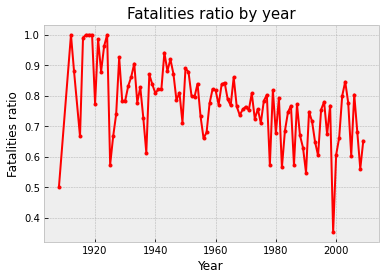

In [36]:
plt.plot(Fatalities.index, 'Proportion', data=Fatalities, marker='.', color='red', linewidth=2)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Fatalities ratio', fontsize=12)
plt.title('Fatalities ratio by year', fontsize=15)
plt.show()

### Dataset 2 import

In [37]:
Totals = pd.read_csv('Dataset2.csv')
Totals.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,Aruba,ABW,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,223502.0,274280.00,NaN,NaN
1,Afghanistan,AFG,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,2.279341e+06,1.737962e+06,2044188.0,2209428.0,1929907.0,1917924.0,1647425.0,1722612.61,NaN,NaN
2,Angola,AGO,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,9.877980e+05,1.132424e+06,1321872.0,1409952.0,1244491.0,1482546.0,1375523.0,1516628.00,NaN,NaN
3,Albania,ALB,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,8.297789e+05,8.143397e+05,865848.0,151632.0,NaN,26634.0,204090.0,303137.00,NaN,NaN
4,Andorra,AND,"Air transport, passengers carried",IS.AIR.PSGR,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
Totals.shape

(264, 65)

In [39]:
Totals = Totals.drop(['Country Name', 'Country Code', 'Indicator Code', 'Indicator Name'], axis=1)

Totals.head()

,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,Unnamed: 64
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,223502.0,274280.00,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.279341e+06,1.737962e+06,2044188.0,2209428.0,1929907.0,1917924.0,1647425.0,1722612.61,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.877980e+05,1.132424e+06,1321872.0,1409952.0,1244491.0,1482546.0,1375523.0,1516628.00,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,8.297789e+05,8.143397e+05,865848.0,151632.0,NaN,26634.0,204090.0,303137.00,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
Totals = Totals.replace(np.nan, 0)
Totals = pd.DataFrame(Totals.sum())


In [41]:
Totals.tail()

,0
2016,3.104586e+10
2017,3.350035e+10
2018,3.588238e+10
2019,0.000000e+00
Unnamed: 64,0.000000e+00


In [42]:
Totals = Totals.drop(Totals.index[0:10])
Totals = Totals['1970':'2008']
Totals.columns = ['Sum']
Totals.index.name = 'Year'

In [43]:
Totals.head()

,Sum
Year,
1970,1.850484e+09
1971,1.979946e+09
1972,1.817426e+09
1973,2.388611e+09
1974,2.867234e+09


In [44]:
Fatalities = Fatalities.reset_index()
Fatalities.head()

,Time,Aboard,Fatalities,Ground,Proportion
0,1908,2.0,1.0,0.0,0.500000
1,1912,5.0,5.0,0.0,1.000000
2,1913,51.0,45.0,0.0,0.882353
3,1915,60.0,40.0,0.0,0.666667
4,1916,109.0,108.0,0.0,0.990826


In [45]:
Fatalities.Time = Fatalities.Time.apply(str)
Fatalities.index = Fatalities['Time']
del Fatalities['Time']
Fatalities = Fatalities['1970':'2008']
Fatalities = Fatalities[['Fatalities']]
Totals = pd.concat([Totals,Fatalities], axis=1)
Totals['Ratio'] = Totals['Fatalities'] / Totals['Sum'] * 100

In [46]:
Totals.head()

,Sum,Fatalities,Ratio
1970,1.850484e+09,2049.0,0.000111
1971,1.979946e+09,1932.0,0.000098
1972,1.817426e+09,2937.0,0.000162
1973,2.388611e+09,2485.0,0.000104
1974,2.867234e+09,2318.0,0.000081


* **Total number of passengers by Year**

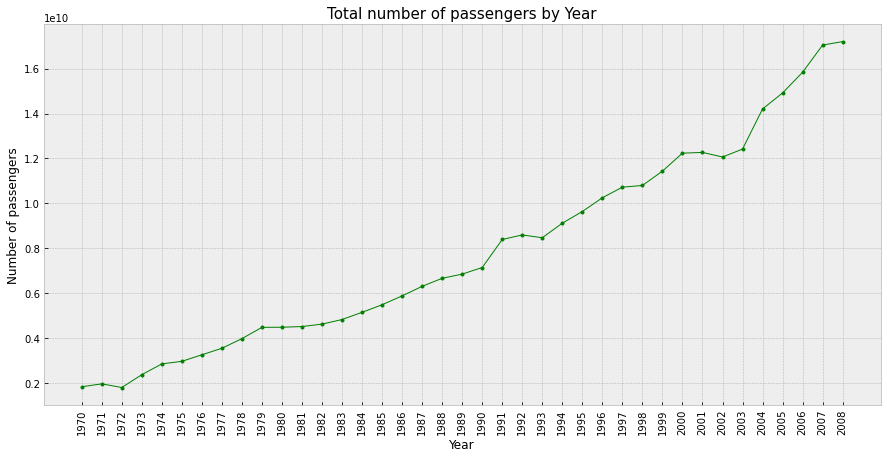

In [47]:
plt.figure(figsize=(15, 7))
plt.plot(Totals.index, 'Sum', data=Totals, marker='.', color='green', linewidth=1)

plt.xlabel('Year')
plt.ylabel('Number of passengers')
plt.title('Total number of passengers by Year', fontsize=15)
plt.xticks(rotation=90)
plt.show()

* **Total number of Deaths by Year**

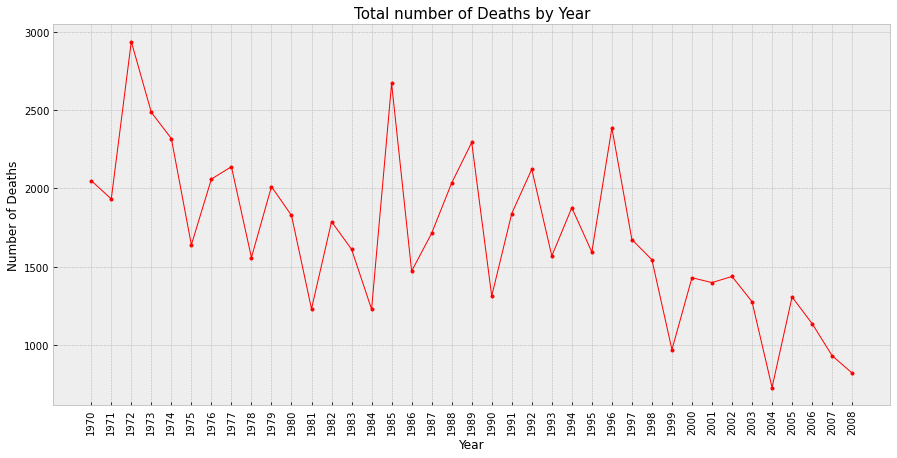

In [48]:
plt.figure(figsize=(15, 7))

plt.plot(Fatalities.index, 'Fatalities', data=Totals, marker='.', color='red', linewidth=1)

plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Total number of Deaths by Year', fontsize=15)
plt.xticks(rotation=90)

plt.show()

* **Fatalities/Total number of passengers ratio by Year**

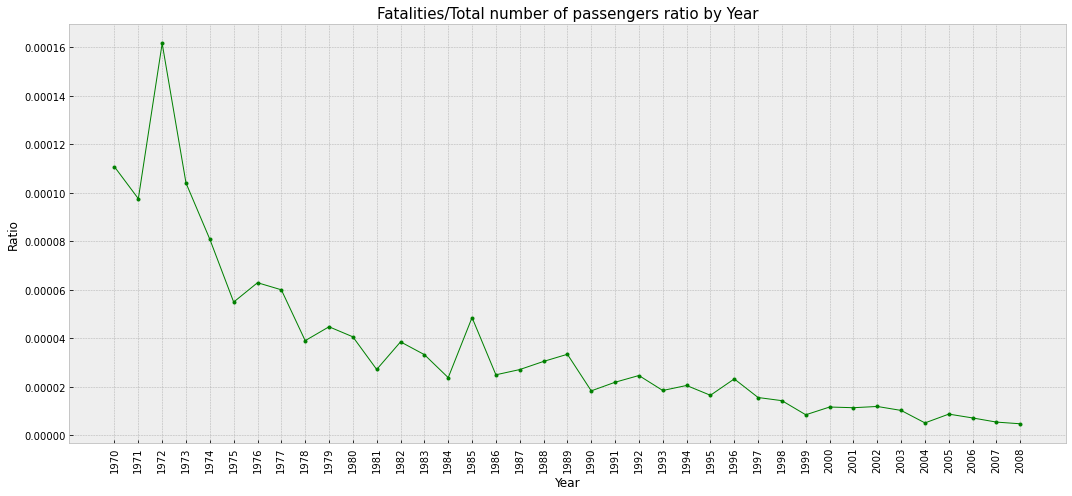

In [49]:
plt.figure(figsize=(15, 7))

plt.plot(Totals.index, 'Ratio', data=Totals, marker='.', color='green', linewidth=1)

plt.xlabel('Year')
plt.ylabel('Ratio')
plt.title('Fatalities/Total number of passengers ratio by Year', fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

### Plot ratio and number of deaths in one plot

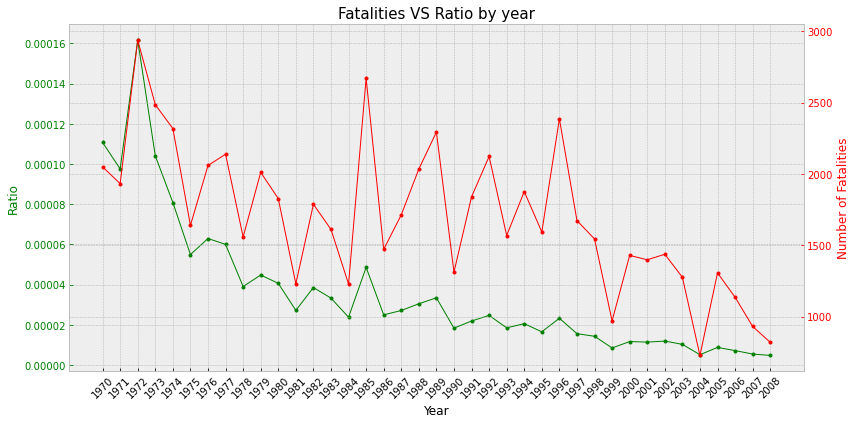

In [50]:
fig = plt.figure(figsize=(12,6))
ax1 = fig.subplots()
ax1.plot(Totals.index, 'Ratio', data=Totals, color='green', marker='.', linewidth=1)
ax1.set_xlabel('Year', fontsize=12)
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(45)
ax1.set_ylabel('Ratio', color='green', fontsize=12)
ax1.tick_params('y', colors='green')
ax2 = ax1.twinx()
ax2.plot(Fatalities.index, 'Fatalities', data=Fatalities, color='red', marker='.', linewidth=1)
ax2.set_ylabel('Number of Fatalities', color='red', fontsize=12)
ax2.tick_params('y', colors='r')
plt.title('Fatalities VS Ratio by year', fontsize=15)
plt.tight_layout()
plt.show()

### Operator Analysis

In [51]:
data.Operator = data.Operator.str.upper()
data.Operator = data.Operator.replace("A B AEROTRANSPORT", 'AB AEROTRANSPORT')

Total_by_Op = data.groupby('Operator')[['Operator']].count()
Total_by_Op = Total_by_Op.rename(columns={'Operator':'Count'})
Total_by_Op = Total_by_Op.sort_values(by='Count', ascending=False).head(15)

In [52]:
Total_by_Op

,Count
Operator,
AEROFLOT,179
MILITARY - U.S. AIR FORCE,176
AIR FRANCE,70
DEUTSCHE LUFTHANSA,65
AIR TAXI,48
UNITED AIR LINES,44
CHINA NATIONAL AVIATION CORPORATION,44
MILITARY - U.S. ARMY AIR FORCES,43
PAN AMERICAN WORLD AIRWAYS,41


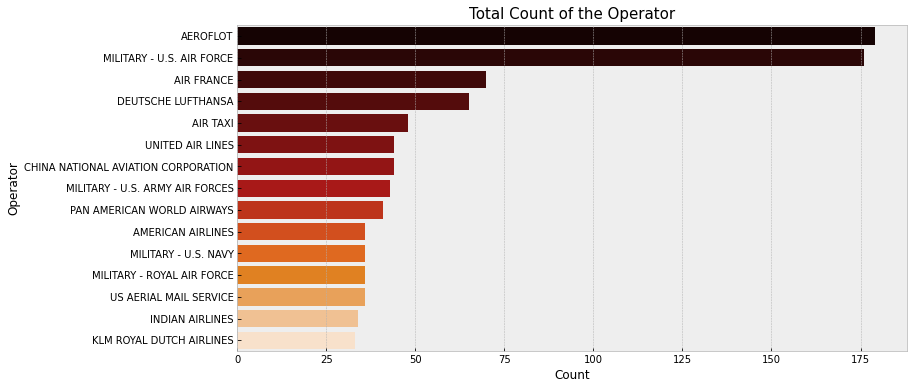

In [53]:
plt.figure(figsize=(12,6))

sns.barplot(y=Total_by_Op.index, x='Count', data=Total_by_Op, palette='gist_heat', orient='h')

plt.xlabel('Count', fontsize=12)
plt.ylabel('Operator', fontsize=12)
plt.title("Total Count of the Operator", fontsize=15)
plt.show()

In [54]:
Prop_by_Op = data.groupby('Operator')[['Fatalities']].sum()
Prop_by_Op = Prop_by_Op.rename(columns={'Operator':'Fatalities'})
Prop_by_Op = Prop_by_Op.sort_values(by='Fatalities', ascending=False)
Prop_by_OpTop = Prop_by_Op.head(15)

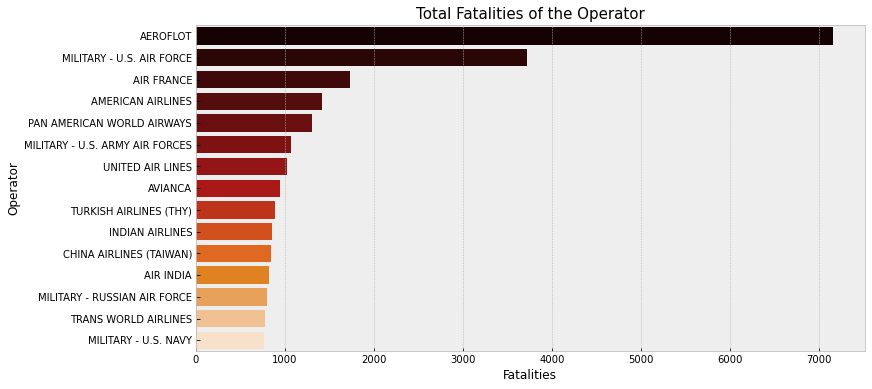

In [55]:
plt.figure(figsize=(12,6))
sns.barplot(y=Prop_by_OpTop.index, x='Fatalities', data=Prop_by_OpTop, palette='gist_heat', orient='h')
plt.xlabel('Fatalities', fontsize=12)
plt.ylabel('Operator', fontsize=12)
plt.title("Total Fatalities of the Operator", fontsize=15)
plt.show()

In [56]:
Prop_by_Op[Prop_by_Op['Fatalities'] == Prop_by_Op.Fatalities.min()].index.tolist()

['MILITARY - EJÉRCITO DEL AIRE',
 'ARARAT AVIA',
 'HEWA BORA AIRWAYS',
 'MILITARY - UKRAINE AIR FORCE',
 'MILITARY - U.S. AIR FORCE / MILITARY U.S. AIR FORCE',
 'CANADIAN AIR TRANSAT',
 'MILITARY U.S. NAVY',
 'ISLAND SKY FERRY - AIR TAXI',
 'US AIRWAYS',
 'SOUTHWEST AIRLINES',
 'CENTURIAN AIR CARGO',
 'AMERICAN INTERNATIONAL AIRWAYS',
 'REGIONAL COMPAGNIE AERIENNE EUROPEENNE',
 'WESTERN HELICOPTER']

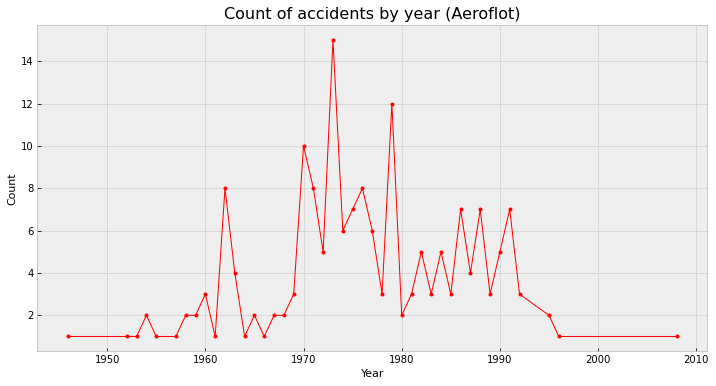

In [57]:
Aeroflot = data[data.Operator == 'AEROFLOT']
Count_by_year = Aeroflot.groupby(data.Time.dt.year)[['Date']].count()
Count_by_year = Count_by_year.rename(columns={'Date':'Count'})

plt.figure(figsize=(12,6))
plt.plot(Count_by_year.index, 'Count', data=Count_by_year, marker='.', color='red', linewidth=1)
plt.xlabel('Year', fontsize=11)
plt.ylabel('Count', fontsize=11)
plt.title('Count of accidents by year (Aeroflot)', fontsize=16)
plt.show()

* Aeroflot accident is increasing after year 1970. Even so the number of crashes and fatalities is increasing, the number of flights is also increasing. And we could actually see that the ratio of fatalities/total amount of passengers trending down (for 2000s). However we can not make decisions about any Operator like "which airline is much safer to flight with" without any knowledge of total amount of flights. If Aeroflot has the largest number of crashes this doesn't mean that it is not worse to flight with because it might have the largest amount of flights.


## Thank You !